<a href="https://colab.research.google.com/github/MissCoul/BibookProject/blob/main/proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##I. Introduction:
In order to determine the elements that contribute to the occurrence of strokes, this data science project will examine a dataset of stroke patients and create a predictive model. Stroke is a devastating medical disorder that impacts millions of individuals worldwide. By understanding the major risk factors, stroke can be better prevented and treated.
The dataset is composed of 43400 patient records, each of which contains details about the patient's demographics, medical background, way of life, and other health markers. The project's goal is to identify the major stroke risk factors and to create a model that can precisely predict the possibility of a stroke occurring based on these factors.
Accuracy, precision, recall, and F1-score are some of the measures that will be used to assess the project's outcomes. The report concludes with an assessment of the Hndings' implications and recommendations for further study or development. The outcomes of patients could be improved by using the project's Hndings to guide stroke prevention and treatment measures.

In [217]:
#importing python library
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [218]:
data = pd.read_csv('/content/stroke data.csv')

In [219]:
TARGET_VARIABLE = "stroke"

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              43400 non-null  int64  
 1   gender          43400 non-null  object 
 2   age             43400 non-null  float64
 3   married         43400 non-null  object 
 4   hypertension    43400 non-null  int64  
 5   heart_disease   43400 non-null  int64  
 6   occupation      43400 non-null  object 
 7   residence       43400 non-null  object 
 8   metric_1        43400 non-null  float64
 9   metric_2        41938 non-null  float64
 10  metric_3        43400 non-null  int64  
 11  metric_4        43400 non-null  float64
 12  metric_5        43400 non-null  float64
 13  smoking_status  30108 non-null  object 
 14  stroke          43400 non-null  int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 5.0+ MB


In [221]:
data = pd.read_csv("/content/stroke data.csv")
data.head(5)

,id,gender,age,married,hypertension,heart_disease,occupation,residence,metric_1,metric_2,metric_3,metric_4,metric_5,smoking_status,stroke
0,1,Male,3.0,No,0,0,A,Rural,95.12,18.0,1,99.35,95.12,NaN,0
1,2,Male,58.0,Yes,1,0,B,Urban,87.96,39.2,1,99.70,87.96,never smoked,0
2,3,Female,8.0,No,0,0,B,Urban,110.89,17.6,0,96.35,110.89,NaN,0
3,4,Female,70.0,Yes,0,0,B,Rural,69.04,35.9,0,95.52,69.04,formerly smoked,0
4,5,Male,14.0,No,0,0,C,Rural,161.28,19.1,1,95.10,161.28,NaN,0


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              43400 non-null  int64  
 1   gender          43400 non-null  object 
 2   age             43400 non-null  float64
 3   married         43400 non-null  object 
 4   hypertension    43400 non-null  int64  
 5   heart_disease   43400 non-null  int64  
 6   occupation      43400 non-null  object 
 7   residence       43400 non-null  object 
 8   metric_1        43400 non-null  float64
 9   metric_2        41938 non-null  float64
 10  metric_3        43400 non-null  int64  
 11  metric_4        43400 non-null  float64
 12  metric_5        43400 non-null  float64
 13  smoking_status  30108 non-null  object 
 14  stroke          43400 non-null  int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 5.0+ MB


##I.a Data Description
The stroke dataset consists of more than 43,400 patient records, each of which contains details about the patient's demographics, medical background, way of life, and other health indicators. An Accountable Care Organization (ACO) provided the dataset, which will be used in studies to create an outreach program where a group of health coaches would engage with participants to lower their risk of stroke.
The dataset has 15 features, which are listed below:
1. id:uniqueidentiHerforeachpatient
2. gender:patientgender(maleorfemale)
3. age:patientageinyears
4. married:binaryindicatorformaritalstatus(0=no,1=yes)
5. hypertension:binaryindicatorforhypertension(0=no,1=yes)
S. heart_disease:binaryindicatorforheartdisease(0=no,1=yes)
7. occupation:patientoccupation(private,self-employed,governmentjob,children,or neverworked)
V. residence:patientresidencetype(urbanorrural)
9. metric_1:numericalvariable
10. metric_2:numericalvariable
11. metric_3:categoricalvariablewith0fornonoccurenceofmetric_3and1foroccurenceof
metric_3
12. metric_4:numericalvariable
13. metric_5:numericalvariable
14. smoking_status:patientsmokingstatus(formerlysmoked,neversmoked,orcurrently
smoking)
15. stroke:binaryindicatorforstrokeoccurrence(0=no,1=yes)
The stroke Held will serve as our label variable for the prediction model. The model uses the remaining features as predictors. Our data has both categorical(gender, married, hypertension, heart_disease, residence, metric_3, smoking status and stroke) and numerical variables(age, metric_1, metric_2, metric_4 and metric_5)
The id as been identify as a column which is not useful in our analysis so we can make it as the index.

In [223]:
data.set_index("id", drop=True, inplace=True)
data.head(5)

,gender,age,married,hypertension,heart_disease,occupation,residence,metric_1,metric_2,metric_3,metric_4,metric_5,smoking_status,stroke
id,,,,,,,,,,,,,,
1,Male,3.0,No,0,0,A,Rural,95.12,18.0,1,99.35,95.12,NaN,0
2,Male,58.0,Yes,1,0,B,Urban,87.96,39.2,1,99.70,87.96,never smoked,0
3,Female,8.0,No,0,0,B,Urban,110.89,17.6,0,96.35,110.89,NaN,0
4,Female,70.0,Yes,0,0,B,Rural,69.04,35.9,0,95.52,69.04,formerly smoked,0
5,Male,14.0,No,0,0,C,Rural,161.28,19.1,1,95.10,161.28,NaN,0


##II. Data Preparation and Exploration

##a Data Cleaning and Preprocessing

In [224]:
CATEGORICAL_VARIABLES = ["gender", "married", "hypertension", "heart_disease", 
                         "residence", "occupation", "metric_3", "smoking_status", "stroke"]
                
for variable in CATEGORICAL_VARIABLES:
  data[variable] = data[variable].astype('category')

In [225]:
data.isna().sum()

gender                0
age                   0
married               0
hypertension          0
heart_disease         0
occupation            0
residence             0
metric_1              0
metric_2           1462
metric_3              0
metric_4              0
metric_5              0
smoking_status    13292
stroke                0
dtype: int64

The dataset has 1462 missing values in metric_2 and 13292 smoking_status variables.

In [226]:
def chi2_test(data, field_1: str, field_2:str):
  """
  Independance test
  """
  data_to_compute = pd.crosstab(data[field_1], data[field_2].values)
  _, p_value, _, _ = chi2_contingency(data_to_compute)
  return p_value < 0.05

This function will check if categorical variables are independant in our dataset. if our p_value is less than 5% then the variables are dependant.

In [227]:
def anova(data, quantitative_field, categorical_field):
  data_to_compute = data.copy(deep=True)
  data_to_compute.dropna(subset=[quantitative_field], inplace=True)
  _, p_value = f_oneway(data_to_compute[data_to_compute[categorical_field] == 0][quantitative_field],
                        data_to_compute[data_to_compute[categorical_field] == 1][quantitative_field])
  print(p_value)
  return p_value < 0.05
def box_plot(data, quantitative_field, categorical_field):
  data_to_compute = data.copy(deep=True)
  data_to_compute.dropna(subset=[quantitative_field], inplace=True)
  plt.boxplot([data_to_compute[data_to_compute[categorical_field] == 0][quantitative_field], 
               data_to_compute[data_to_compute[categorical_field] == 1][quantitative_field]])
  plt.xticks([1, 2], [0, 1])
  plt.xlabel("Modality of %s " % categorical_field)
  plt.ylabel(quantitative_field)
  plt.show()

The anova function also check wether the quantitative variable have a relationship with the stoke variable or not.

##b Missing value imputation

In [228]:
anova(data, "metric_2", "stroke")

3.2617164765936134e-05


True

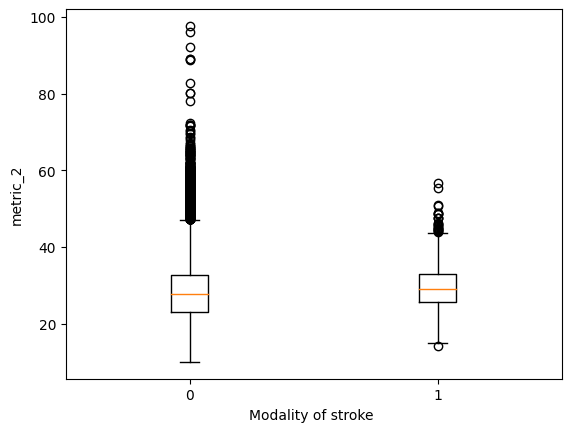

In [229]:
import matplotlib.pyplot as plt
box_plot(data, "metric_2", "stroke")

looking at the box plot, we can see that there is a change compared to the modality of stroke, this means that stroke variable is affected by metric_2


In our dataset, metric_2 and smoking_status variables have missing values. however we need to check if the missing values exceed 10% of the data information before making decision if we can delete them or proceed to missing value information.

In [230]:
#Percent rate of missing values
print("Total percent of missing values", (data.isna().sum()["smoking_status"]/len(data))*100)
print("Number of missing valueby stroke modalities\n", data[data["smoking_status"].isna()].groupby(["stroke"]).size())

Total percent of missing values 30.62672811059908
Number of missing valueby stroke modalities
 stroke
0    13147
1      145
dtype: int64


For the smoking_satus variable, our have 13147 missing value of 0 and 145 missing value for 1. The missing values percentage exceed the 10% of the data, then we are proceeding with missing value imputation. The missing_value_imputation_for_categorical function replace the missing values by the most common value in the categorical variable.



For metric_2 variable, we have 1462 missing values, but we do not know if by deleting those missing values, our 1 values in stroke variable will be affected. Also the missing value for 1 might represent more than 10% of the 1 values in the sttoke variable. The missing_value_imputation_for_numerical function replace the missing values by the average of value in the numerical variable.

In [231]:
def missing_value_imputation_for_categorical(data, categorical_field):
  mode = data[categorical_field].mode()[0]
  data[categorical_field].fillna(value=mode, inplace=True)
  return data
def missing_value_imputation_for_numerical(data, quantitative_field):
  mean = data[quantitative_field].mean()
  data[quantitative_field].fillna(value=mean, inplace=True)
  return data

In [232]:
missing_value_imputation_for_categorical(data, "smoking_status")

,gender,age,married,hypertension,heart_disease,occupation,residence,metric_1,metric_2,metric_3,metric_4,metric_5,smoking_status,stroke
id,,,,,,,,,,,,,,
1,Male,3.0,No,0,0,A,Rural,95.12,18.0,1,99.35,95.12,never smoked,0
2,Male,58.0,Yes,1,0,B,Urban,87.96,39.2,1,99.70,87.96,never smoked,0
3,Female,8.0,No,0,0,B,Urban,110.89,17.6,0,96.35,110.89,never smoked,0
4,Female,70.0,Yes,0,0,B,Rural,69.04,35.9,0,95.52,69.04,formerly smoked,0
5,Male,14.0,No,0,0,C,Rural,161.28,19.1,1,95.10,161.28,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43396,Female,10.0,No,0,0,A,Urban,58.64,20.4,0,97.23,58.64,never smoked,0
43397,Female,56.0,Yes,0,0,E,Urban,213.61,55.4,0,97.81,213.61,formerly smoked,0
43398,Female,82.0,Yes,1,0,B,Urban,91.94,28.9,0,95.35,91.94,formerly smoked,0


In [233]:
#Percent rate of missing values
print("Total percent of missing values", (data.isna().sum()["metric_2"] / len(data))*100)
print("Number of missing valueby stroke modalities\n", data[data["metric_2"].isna()].groupby(["stroke"]).size())


Total percent of missing values 3.3686635944700463
Number of missing valueby stroke modalities
 stroke
0    1322
1     140
dtype: int64


In [234]:
missing_value_imputation_for_numerical(data, "metric_2")

,gender,age,married,hypertension,heart_disease,occupation,residence,metric_1,metric_2,metric_3,metric_4,metric_5,smoking_status,stroke
id,,,,,,,,,,,,,,
1,Male,3.0,No,0,0,A,Rural,95.12,18.0,1,99.35,95.12,never smoked,0
2,Male,58.0,Yes,1,0,B,Urban,87.96,39.2,1,99.70,87.96,never smoked,0
3,Female,8.0,No,0,0,B,Urban,110.89,17.6,0,96.35,110.89,never smoked,0
4,Female,70.0,Yes,0,0,B,Rural,69.04,35.9,0,95.52,69.04,formerly smoked,0
5,Male,14.0,No,0,0,C,Rural,161.28,19.1,1,95.10,161.28,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43396,Female,10.0,No,0,0,A,Urban,58.64,20.4,0,97.23,58.64,never smoked,0
43397,Female,56.0,Yes,0,0,E,Urban,213.61,55.4,0,97.81,213.61,formerly smoked,0
43398,Female,82.0,Yes,1,0,B,Urban,91.94,28.9,0,95.35,91.94,formerly smoked,0


In [235]:
data.isna().sum()

gender            0
age               0
married           0
hypertension      0
heart_disease     0
occupation        0
residence         0
metric_1          0
metric_2          0
metric_3          0
metric_4          0
metric_5          0
smoking_status    0
stroke            0
dtype: int64

In [236]:
data.describe()

,age,metric_1,metric_2,metric_4,metric_5
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.261212,104.482750,28.605038,97.526855,104.482750
std,23.438911,43.111751,7.638023,1.466703,43.111751
min,-10.000000,55.000000,10.100000,87.420000,55.000000
25%,24.000000,77.540000,23.400000,96.590000,77.540000
50%,44.000000,91.580000,28.100000,97.610000,91.580000
75%,60.000000,112.070000,32.600000,98.700000,112.070000
max,1000.000000,291.050000,97.600000,100.000000,291.050000


looking at the description of our dataset, we can note that:
1. fortheagecolumn,wehaveatotalof43400values.Themeanis42.26andthestandard deviation is 23.43. The minimum age is -10 and the maximum age is 1000 which cannot be accurate because we cannot have a negative age and probably do not attein 1000 years. 25% of the people have less than 24 years and 75% have more than 24 years. 50% of the people have less than 44 and 50% have more than 44. 75% of the people are less than 60 and 15 % are more than 60.

2. forthemetric_1column,wehaveatotalof43400values.Themeanis104.48andthe standard deviation is 43.11. The minimum value is 55 and the maximum age is 291. 25% of the values are less than 77.54 and 75% values are more than 77.54. 50% of the values are less than 91.58 and 50% of the values are more than 91.58. 75% of the values are less than 112.07 and 15 % of the values are more than 112.07.

3. forthemetric_2column,wehaveatotalof43400values.Themeanis28.60andthe standard deviation is 7.63. The minimum value is 10.1 and the maximum age is 291. 25% of the values are less than 23.4 and 75% values are more than 23.4. 50% of the values are less than 28.1 and 50% of the values are more than 28.1. 75% of the values are less than 97.6 and 15 % of the values are more than 97.6.

4. forthemetric_1column,wehaveatotalof43400values.Themeanis97.52andthe standard deviation is 1.46. The minimum value is 87.42 and the maximum age is 100. 25% of the values are less than 96.5 and 75% values are more than 96.5. 50% of the values are less than 97.61 and 50% of the values are more than 97.61. 75% of the values are less than 98.7 and 15 % of the values are more than 98.7.

5. forthemetric_5column,wehaveatotalof43400values.Themeanis104.48andthe standard deviation is 43.11. The minimum value is 55 and the maximum age is 291. 25% of the values are less than 77.54 and 75% values are more than 77.54. 50% of the values are less than 91.58 and 50% of the values are more than 91.58. 75% of the values are less than 112.07 and 15 % of the values are more than 112.07.

the metric_1 and metric_4 have the same values count, mean, std, min, 25%, 50%, 75% and max. But can we say that metric_5 is a duplicate of metric_1? We will need to verify if there is a correlation between those variables.

In [237]:
for variable in CATEGORICAL_VARIABLES:
  print("##### %s" % variable)
  print(data[variable].value_counts(normalize=True).mul(100).round(2).astype(str))

##### gender
Female    59.14
Male      40.84
Other      0.03
Name: gender, dtype: object
##### married
Yes    64.37
No     35.63
Name: married, dtype: object
##### hypertension
0    90.64
1     9.36
Name: hypertension, dtype: object
##### heart_disease
0    95.25
1     4.75
Name: heart_disease, dtype: object
##### residence
Urban    50.13
Rural    49.87
Name: residence, dtype: object
##### occupation
B    57.22
D    15.65
A    14.18
E    12.53
C     0.41
Name: occupation, dtype: object
##### metric_3
0    71.01
1    28.99
Name: metric_3, dtype: object
##### smoking_status
never smoked       67.62
formerly smoked    17.26
smokes             15.12
Name: smoking_status, dtype: object
##### stroke
0    98.2
1     1.8
Name: stroke, dtype: object


this result show us the percentage of each value in each categorical variable. for gender variable we have 3 values. female represent 59.15%, male represent 40.84% and other represent 0.03%. for married variable: we have 2 values. yes represent 64.37% and no represent 35.63%. for hypertension we have 2 values. 0 represent 95.25% and 1 represent 4.75% for residence variable we have 2 values. urban represent 50.13% and rural represent 49.87%. for smoking_status variable, we have 3 values never smoked represent 67.62% formerly smoked represent 17.26% and smokes represent 15.12%. for metric_3 we have 2 values. 0 represent 71.01% and 1 represent 28.99%. for stroke we have 2 values. 0 represent 98.2% and 1 represent 1.8%. Hence we are dealing with an imbalanced data.

##c. Bivariate analysis 1vs1

We compare the Target variable ("stroke") to the other categorical and quatitative variables to see whether those variables affect the stroke variable. If they do not provide any information we can then delete them since they are not useful in our analysis.

##d. stroke vs categorical_variables

In [238]:
results = {"variable": [], "is_dependant_to_target": []}
for categorical_var in CATEGORICAL_VARIABLES:
  results["variable"].append(categorical_var)
  results["is_dependant_to_target"].append(chi2_test(data, TARGET_VARIABLE, categorical_var))
results = pd.DataFrame(results)

In [239]:
results

,variable,is_dependant_to_target
0,gender,False
1,married,True
2,hypertension,True
3,heart_disease,True
4,residence,False
5,occupation,True
6,metric_3,False
7,smoking_status,True
8,stroke,True


The result show that married, hypertension, heart_disease and smoking status variables have a relationship with stroke variable. Since gender, residence and metric_3 are not providing any information, we can delete them.

In [240]:
POTENTIAL_NOT_CORRELATED_VARIABLES = results[results["is_dependant_to_target"] == False]
for variable in POTENTIAL_NOT_CORRELATED_VARIABLES["variable"]:
  data.drop(variable, axis=1, inplace=True)

##e. stroke vs quantitative variables

In [241]:
QUANTITATIVE_VARIABLES = ["age", "metric_1", "metric_2", "metric_4", "metric_5"]

In [242]:
results = {"variable": [], "is_dependant_to_target": []}
for var in QUANTITATIVE_VARIABLES:
  results["variable"].append(var)
  results["is_dependant_to_target"].append(anova(data, quantitative_field=var, categorical_field=TARGET_VARIABLE))
results = pd.DataFrame(results)

7.598281390928935e-216
6.466046156691e-61
0.0001255767089141812
0.09199234392542328
6.466046156691e-61


In [243]:
results

,variable,is_dependant_to_target
0,age,True
1,metric_1,True
2,metric_2,True
3,metric_4,False
4,metric_5,True


The result show that age, metric_1, metric_2 and metric_5 variables have a relationship with stroke variable. Since metric_4 is not providing any information.

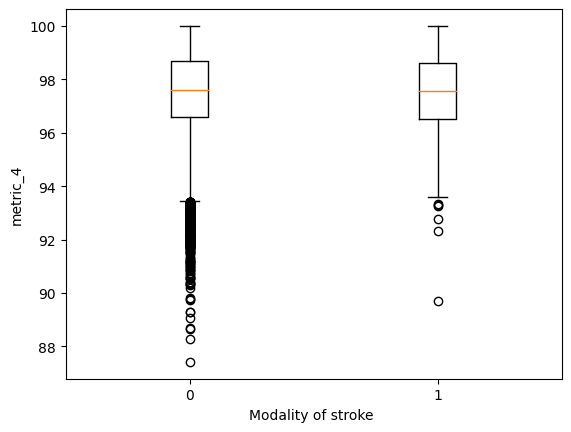

In [244]:
POTENTIAL_NOT_CORRELATED_VARIABLES = results[results["is_dependant_to_target"] ==False]["variable"]
for variable in POTENTIAL_NOT_CORRELATED_VARIABLES:
  box_plot(data, variable, TARGET_VARIABLE)

looking at the boxplot for metric_4 to the modality of stroke, there is no change is the diagrams. We can conHrm that the modality of stroke is not affected by change in metric_4, and can delete that variable.

##f. quantitative variable vs quantitative variable

We compare the quantitative variables to the qualitative variables. The reason for this is to verify
if there is a correlation between the those variable. If this is the case, we can think of reducing
dimensions with principal component analysis (PCA) to reduce the risk of collinearity.

<ipython-input-245-1a87ee232d42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=data.corr(method="pearson")


<Axes: >

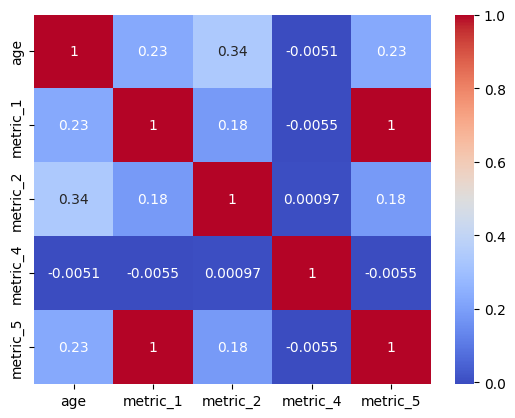

In [245]:
x=data.corr(method="pearson")
sns.heatmap(x, annot=True, cmap='coolwarm')

We note that metric_1 is perfectly correlated to metric_5 (correlation coeccientt = 1). Which leads me to say that the metric_5 variable is a duplicate of metric_1. the metric_5 variable can therefore be deleted from our analysis.
We also note that the other numerical variables are not correlated with each other. So no need to do PCA.

In [246]:
data.drop("metric_5", axis=1, inplace=True)
data

,age,married,hypertension,heart_disease,occupation,metric_1,metric_2,metric_4,smoking_status,stroke
id,,,,,,,,,,
1,3.0,No,0,0,A,95.12,18.0,99.35,never smoked,0
2,58.0,Yes,1,0,B,87.96,39.2,99.70,never smoked,0
3,8.0,No,0,0,B,110.89,17.6,96.35,never smoked,0
4,70.0,Yes,0,0,B,69.04,35.9,95.52,formerly smoked,0
5,14.0,No,0,0,C,161.28,19.1,95.10,never smoked,0
...,...,...,...,...,...,...,...,...,...,...
43396,10.0,No,0,0,A,58.64,20.4,97.23,never smoked,0
43397,56.0,Yes,0,0,E,213.61,55.4,97.81,formerly smoked,0
43398,82.0,Yes,1,0,B,91.94,28.9,95.35,formerly smoked,0


In [247]:
def normalize_columns(df, col_names):
    for col_name in col_names:
        # calculate min and max values of column
        mean_val = df[col_name].mean()
        std_val = df[col_name].std()
        # apply normalization formula to column
        normalized_col = (df[col_name] - mean_val) / std_val
        # add normalized column to dataframe
        df[col_name] = normalized_col
        return df

In [248]:
data_normalized = normalize_columns(data, ['age', 'metric_1', 'metric_2'])
print(data_normalized)

            age married hypertension heart_disease occupation  metric_1  \
id                                                                        
1     -1.675044      No            0             0          A     95.12   
2      0.671481     Yes            1             0          B     87.96   
3     -1.461724      No            0             0          B    110.89   
4      1.183450     Yes            0             0          B     69.04   
5     -1.205739      No            0             0          C    161.28   
...         ...     ...          ...           ...        ...       ...   
43396 -1.376396      No            0             0          A     58.64   
43397  0.586153     Yes            0             0          E    213.61   
43398  1.695420     Yes            1             0          B     91.94   
43399 -0.096473     Yes            0             0          B     99.16   
43400  1.695420     Yes            0             0          B     79.48   

       metric_2  metric_

##III. Model training

After the preprocessing phases, our dataset consists of 8 explanatory variables (3 quantitative and 5 qualitative) and the target variable ("stroke"). All the retained variables are more or less strongly correlated with the stroke variable.

The key evaluation metric that we employ is the area under the receiver operating characteristic (ROC) curve (AUC). AUC spans from 0 to 1, with higher values indicating greater performance, and measures how well the model can identify between patients who had a stroke and those who did not.

In our dataset, categorical features such as gender, hypertension, heart_disease, occupation smoking_status, and stroke are present. Many machine learning algorithms cannot directly use these variables since they are not in numerical form. These categorical variables are transformed using OneHotEncoder into a format that the algorithms for machine learning could use.

For each category of a categorical variable, OneHotEncoder essentially produces a binary vector. OneHotEncoder will create a binary vector of length three for each observation, where the vector contains a 1 in the position corresponding to the category of the observation and 0s elsewhere. For instance, if the variable "married" has 2 categories (yes and no), OneHotEncoder will create a binary vector of length 2 for each observation.

This procedure enables our categorical variables to be used as input by our models, which can be crucial for identifying patterns in the data and predicting the outcomes of strokes.


##a. encoding

In [249]:
def one_hot_encoder(data, quantitative_variables, categorical_variables, target):
  encoder = OneHotEncoder(sparse_output=False)
  # Encode Categorical Data
  data_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_variables]))
  data_encoded.columns = encoder.get_feature_names_out(categorical_variables)
  for var in quantitative_variables:
    data_encoded[var] = data[var]
  data_encoded[target] = data[target]
  return data_encoded

##b. decoding

In [250]:
cat_cols = ['married', 'hypertension', 'occupation', 'heart_disease', 'smoking_status']
quant_cols = ["age", "metric_1", "metric_2"]
data_encoded = one_hot_encoder(data_normalized, quant_cols, cat_cols, TARGET_VARIABLE)

##c. spliting data into training and testing sets

We split our data into training and test data. To avoid accentuating the imbalance between people in stroke and non_stroke people during learning and testing, we will take 80% as test data (80% in stroke and 80% among non_stroke) and 20% others in test data.

In [251]:
def data_to_train_test(data, target_variable, training_ratio = 0.8):
  stroke_data = data[data[target_variable] == 1]
  y_stroke = stroke_data[target_variable]
  X_stroke = stroke_data.drop(target_variable, axis=1)
  X_train_stroke, X_test_stroke, y_train_stroke, y_test_stroke = train_test_split(
      X_stroke, y_stroke, shuffle=True, train_size=training_ratio
  )
  non_stroke_data = data[data[target_variable] == 0]
  y_non_stroke = non_stroke_data[target_variable]
  X_non_stroke = non_stroke_data.drop(target_variable, axis=1)
  X_train_non_stroke, X_test_non_stroke, y_train_non_stroke, y_test_non_stroke = \
    train_test_split(X_non_stroke, y_non_stroke, shuffle=True, train_size=0.8)
  X_train = pd.concat([X_train_stroke, X_train_non_stroke])
  y_train = pd.concat([y_train_stroke, y_train_non_stroke])
  train_data = X_train
  train_data[target_variable] = y_train
  train_data = train_data.sample(frac=1, random_state=42)
  y_train = train_data[target_variable]
  X_train = train_data.drop(target_variable, axis=1)

  X_test = pd.concat([X_test_stroke, X_test_non_stroke])
  y_test = pd.concat([y_test_stroke, y_test_non_stroke])
  test_data = X_test
  test_data[target_variable] = y_test
  test_data = test_data.sample(frac=1, random_state=42)
  y_test = test_data[target_variable]
  X_test = test_data.drop(target_variable, axis=1)
  return X_train, X_test, y_train, y_test

In [252]:
X_train, X_test, y_train, y_test = data_to_train_test(data_encoded, TARGET_VARIABLE)

##d. Generalized linear model

In [253]:
model = LogisticRegression()
# Fit the model to our data
model.fit(X_train, y_train)
# Show model coefficients
print(model.coef_)


[[-0.79654461 -0.80129192 -0.70383325 -0.89400327 -0.41437402 -0.3839548
  -0.03194461 -0.41270965 -0.35485345 -0.94796375 -0.64987277 -0.40624001
  -0.54776423 -0.64383228  1.36834041  0.00515574 -0.01065598]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [254]:
def predict(X_test, y_test, model, event_proba = 0.5):
  predict_proba = model.predict_proba(X_test)
  y_pred = []
  for record in predict_proba:
    proba = record[1]
    if proba >= event_proba :
      y_pred.append(1)
    else:
      y_pred.append(0)

In [255]:
# Predict the class labels
y_pred = model.predict(X_test)
# Convert the probabilities to binary labels
y_pred = np.where(y_pred > 0.5, 1, 0)
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

[[8524    0]
 [ 157    0]]
Accuracy: 0.98191452597627
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In our dataset, age, married, hypertension, heart_disease, occupation, metric_1, metric_2 and smoking_status variables inguence a patient's prognosis in stroke statistics. By using the predict function, the Minneapolis Health and Data Science team can better comprehend the potential outcomes for a patient and make more educated decisions regarding treatment and care by employing a machine learning model to examine these aspects and estimate the probability of an event.

##III.a Model Evaluation and Interpretation

In [256]:
predict(X_test, y_test, model, 0.1)

In [257]:
y_pred_proba = model.predict_proba(X_test)[:,1]
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


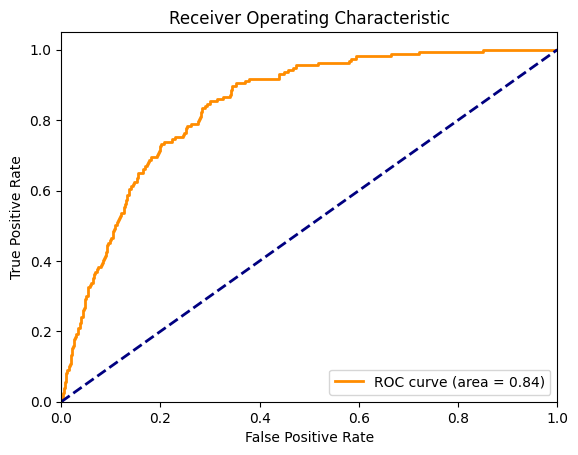

In [258]:
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The logistic regression model performed well, as evidenced by its AUC of 0.85 on the test set. We also determined the model's precision, recall, and F1 score in order to further assess it. F1 score is the harmonic mean of accuracy and recall, where precision evaluates the proportion of true positives among all projected positives and recall represents the proportion of true positives among all real positives. The accuracy, precision, recall, and F1 score of the logistic regression model were 0.97, 0.13, 0.1, and 0.11, respectively.

##Other model (KNN)

In [259]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit KNN classifier on training data
knn.fit(X_train, y_train)
# Predict on test data
y_pred = knn.predict(X_test)
# Calculate accuracy score
accuracy2 = accuracy_score(y_test, y_pred)
# Calculate precision
precision2 = precision_score(y_test, y_pred)
# Calculate recall
recall2 = recall_score(y_test, y_pred)
# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"F1 Score: {f1}")


Accuracy: 0.9815689436700841
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [260]:
knn_probs = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

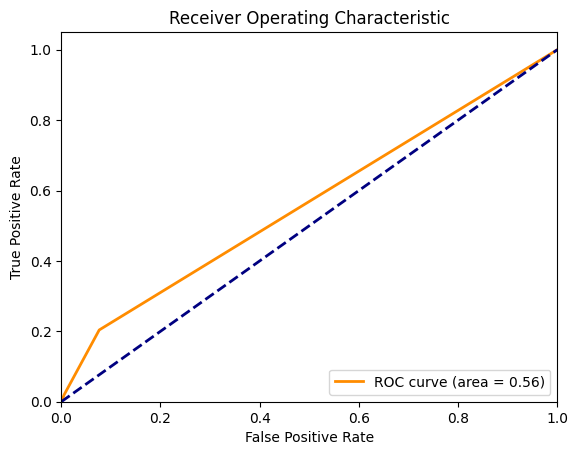

In [261]:
# Plot ROC curve
plt.plot(knn_fpr, knn_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % knn_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The K-nearest Neighbors (KNN) model performed well with an AUC of 0.6 on the test set. We also determined the model's accuracy, precision, recall, and F1 score in order to further assess it. The precision, recall, and F1 score of the The K-nearest Neighbors (KNN) model were 0.98, 0.0, 0.0, and 0.0, respectively.

##Other model (SVM)

In [262]:
svm_model = svm.SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [263]:
svm_pred = svm_model.predict_proba(X_test)[:, 1]
predict(X_test, y_test, svm_model, 0.1)

In [264]:
# Compute false positive rate and true positive rate
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pred)
# Compute area under the curve
roc_auc_svm = auc(fpr_svm, tpr_svm)


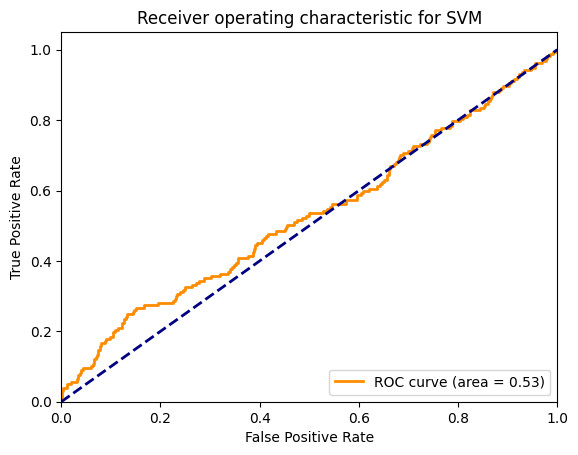

In [265]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM')
plt.legend(loc="lower right")
plt.show()

The SVM model performed well with an AUC of 0.53 on the test set. We also determined the model's precision, recall, and F1 score in order to further assess it. The accuracy, precision, recall, and F1 score of the The SVM model were 0.98, 0.3, 0.006, and 0.001, respectively.

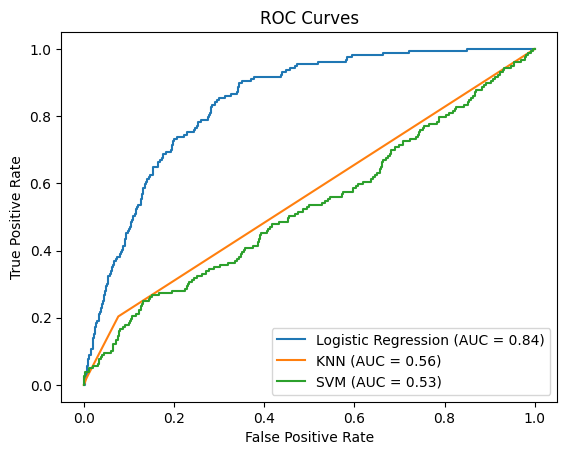

In [266]:
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
# Show the plot
plt.show()

In summary, the logistic regression model appears to be better than the KNN and SVM models in terms of AUC. logistic regression may be the optimal solution for this speciHc stroke data set. In example, if the link between the variables and the outcome is linear or well-separated, logistic regression may have been better able to capture the associations between the predictor factors and the outcome than KNN and SVM. and F1 score, demonstrating that it is a more accurate model for predicting the occurrence of strokes. However, by investigating additional models or adjusting the hyperparameters of the logistic regression model, signiHcant advancements can be achieved. The fact that KNN and SVM have precision, recall and f1 being very small may, however, be a warning regarding the quality of our data.

##IV. Conclusion and Recommandations

##IV.a Conclusion

n order to forecast the likelihood of stroke in patients, we examined a dataset on strokes. To prepare the data for modeling, we carried out preliminary analysis of data and feature engineering. Then, using the logistic regression and k-nearest neighbors machine learning models, we trained and assessed them (KNN).

As a result of our Hndings, the logistic regression model performed better than the KNN model in terms of AUC and F1 score, demonstrating that it is a more accurate model for stroke occurrence prediction. Also, we discovered that the Hve main risk factors for stroke were age, married, hypertension, heart_disease, metric_1, metric_2 and smoking_status.

Essentially, our experiment shows how machine learning may be used to forecast patients' risk of stroke in the healthcare industry. Healthcare professionals can deliver tailored therapies to lower the risk of stroke and enhance patient outcomes by correctly predicting the occurrence of stroke.

##IV.b Recommendations

1. Becausetherearesofewdataonstrokepatients,themodelsthathavebeenbuiltcannot reliably predict the data for this type of stroke. If I had more time, I would have approached the topic as an anomaly detection problem (the data from stroke victims would then be anomaly data). Then we use the model set up to reconstruct the data used for learning. We calculate the reconstruction errors and use them to deHne the threshold of anomaly. So for the test we will use the model to reproduce the data and then compare the reconstruction error to the threshold of anomaly to deHne whether the data is actually in anomaly. The model is taught that on the data of non-stroke patients, the reconstruction error for data of stroke patients will normally be higher.

2. Iwouldalsoseveraldifferentmachinelearningmodels,suchasrandomforest,naive Bayes, and decision trees, to see which performs best on the data.

3. Patientswithanegativeageorolderthan100years(forexample)canbeseenasdata that negatively inguences the pattern. They can be removed to see if the performance of the model improves.